**Data Mining Project Explotary Data Analysis**

In [23]:
!pip install pandas
!pip install mlxtend
!pip install pyfpgrowth

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=7129) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=7129) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=7129) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [24]:
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [25]:
import pandas as pd

df = pd.read_csv("data_mining_project.csv", sep=';')

/var/folders/vt/0x3f4crs5lb36gfgww7p5kb40000gn/T/ipykernel_7129/2925505374.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_mining_project.csv", sep=';')


In [26]:
df.shape

(522064, 7)

In [27]:
df.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [28]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [29]:
df.isnull()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
522059,False,False,False,False,False,False,False
522060,False,False,False,False,False,False,False
522061,False,False,False,False,False,False,False
522062,False,False,False,False,False,False,False


In [30]:
df.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

In [31]:
# df['BillNo'] = df['BillNo'].fillna(value=0)
# df['BillNo'] = df['BillNo'].astype('int64')
# df['Date'] = df['Date'].astype('datet÷ime64')
if df['Price'].dtype == 'object':
  df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

df['CustomerID'] = df['CustomerID'].fillna(value=0)
df['CustomerID'] = df['CustomerID'].astype('int64')

In [32]:
df.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID      int64
Country        object
dtype: object

In [33]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850,United Kingdom


In [34]:
print('Date null count' ,  df['Date'].isnull().sum())
print('Quantity null count' ,  df['Quantity'].isnull().sum())
print('BillNo null count' ,  df['BillNo'].isnull().sum())
print('Itemname null count' ,  df['Itemname'].isnull().sum())
print('Price null count' ,  df['Price'].isnull().sum())
print('CustomerID null count' ,  df['CustomerID'].isnull().sum())
print('Country null count' ,  df['Country'].isnull().sum())

Date null count 0
Quantity null count 0
BillNo null count 0
Itemname null count 1455
Price null count 0
CustomerID null count 0
Country null count 0


In [35]:
result = df.groupby(['CustomerID'])['CustomerID'].sum();
# df.plot()
print(result)

CustomerID
0               0
12346       12346
12347     2247154
12349      901477
12350      209950
           ...   
18280      182800
18281      127967
18282      219384
18283    13821948
18287     1280090
Name: CustomerID, Length: 4298, dtype: int64


<Axes: >

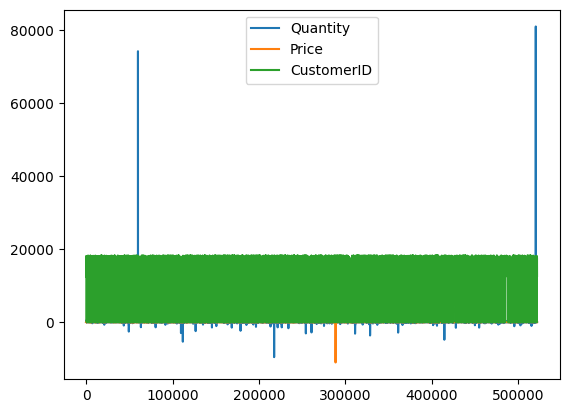

In [36]:
df.plot()

<Axes: >

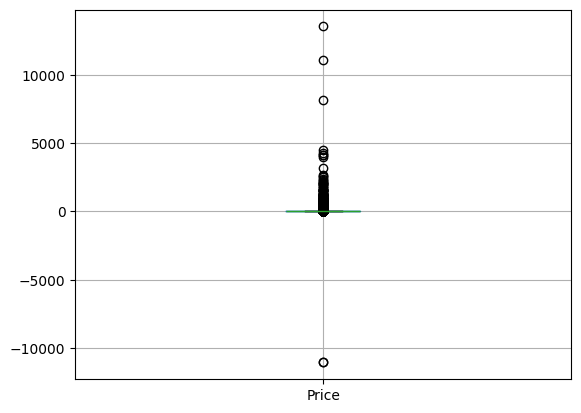

In [37]:
df.boxplot(column=['Price'])

In [38]:
df.dropna(subset=['Itemname'], inplace=True)

In [39]:
customerTransactions = [trans[1]['Itemname'].tolist() for trans in list(df.groupby(['CustomerID', 'Date']))]

In [40]:
len(customerTransactions)


19940

In [41]:
transEncoder = TransactionEncoder()
transEncoderMatrix = transEncoder.fit(customerTransactions).transform(customerTransactions)
transEncoderMatrix = pd.DataFrame(transEncoderMatrix, columns=transEncoder.columns_)

In [42]:
transEncoderMatrix.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
def performRuleCalculation(transactItemsMatrix, ruleType="fpgrowth", minSupport=0.001):
    startTime = 0
    totalExecution = 0

    if(not ruleType=="fpgrowth"):
        startTime = time.time()
        ruleItems = apriori(transactItemsMatrix,
                       min_support=minSupport,
                       use_colnames=True)
        totalExecution = time.time() - startTime
        print("Apriori Analysis")

    else:
        startTime = time.time()
        ruleItems = fpgrowth(transactItemsMatrix,
                       min_support=minSupport,
                       use_colnames=True)
        totalExecution = time.time() - startTime
        print("FP Growth Analysis")

    ruleItems['number_of_items'] = ruleItems['itemsets'].apply(lambda x: len(x))

    return ruleItems, totalExecution



In [ ]:
fpgrowthMatrix, fpGrowthExecTime = performRuleCalculation(transEncoderMatrix)
print("Fp Growth execution took: {} seconds".format(fpGrowthExecTime))

In [ ]:
fpgrowthMatrix.head()

In [ ]:
fpgrowthMatrix.tail()

In [ ]:
def computeAssociationRule(ruleMatrix, metric="lift", minThreshold=1):
     rules = association_rules(ruleMatrix,
                              metric=metric,
                              min_threshold=minThreshold)

    return rules

In [ ]:
fpGrowthRuleLift = computeAssociationRule(fpgrowthMatrix)

In [ ]:
fpGrowthRuleLift.head()

In [ ]:
def plotMetricsRelationship(ruleMatrix, col1, col2):
    fit = np.polyfit(ruleMatrix[col1], ruleMatrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(ruleMatrix[col1], ruleMatrix[col2], 'yo', ruleMatrix[col1],
    fit_funt(ruleMatrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [ ]:
plotMetricsRelationship(fp_growth_rule_lift, col1='lift', col2='confidence')

In [ ]:
fpGrowthRule = computeAssociationRule(fpgrowthMatrix, metric="confidence", min_thresh=0.2)
fpGrowthRule.head()

**Apriori**

In [ ]:
aprioriMatrix, aprioriExecTime = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(aprioriExecTime))

In [ ]:
aprioriMatrix.head()

In [ ]:
aprioriMatrix.tail()

In [ ]:
aprioriRuleLift = computeAssociationRule(aprioriMatrix)

In [ ]:
aprioriRuleLift.head()

In [ ]:
plotMetricsRelationship(aprioriRuleLift, col1='lift', col2='confidence')

In [ ]:
aprioriGowthRule = computeAssociationRule(aprioriMatrix, metric="confidence", min_thresh=0.2)
aprioriGowthRule.head()